<a href="https://colab.research.google.com/github/deethereal/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys, numpy as np
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [7]:
from skimage.io import imread,imshow


**Cтаохастический градиентный спуск**

In [3]:

images, labels=(x_train[0:1000].reshape(1000,28*28)/255,y_train[0:1000])
#one_hot_labels=np.eye((len(labels),10))
one_hot_labels=np.zeros((len(labels),10))
for i,l in enumerate(labels):
  one_hot_labels[i][l]=1
labels=one_hot_labels


test_images=(x_test.reshape((len(x_test),28*28))/255)
test_labels= np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
  test_labels[i][l]=1

np.random.seed(1)
relu=lambda x: (x>=0)*x
relu2div=lambda x: (x>=0)

In [123]:

learning_rate, niter, hidden_size, pix_per_img, num_labels = (0.005,400,40,784,10)
W01=0.2*np.random.random((pix_per_img,hidden_size)) - 0.1
W12=0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(niter):
  error,correct_cnt=(0.0,0)
  #print(error)
  for i in range(len(images)):
    l0=images[i:i+1]
    l1=relu(np.dot(l0,W01))
    drop_out_mask=np.random.randint(2,size=l1.shape) #распределение бернули: выключеаем 50% нейронов
    l1*=drop_out_mask*2
    l2=np.dot(l1,W12)
    
    error += np.sum((labels[i:i+1]-l2)**2)
    correct_cnt+= int(np.argmax(l2)==np.argmax(labels[i:i+1]))

    delta_l2=labels[i:i+1]-l2
    delta_l1=delta_l2.dot(W12.T)*relu2div(l1)
    delta_l1*=drop_out_mask

    W12+=learning_rate*l1.T.dot(delta_l2)
    W01+=learning_rate*l0.T.dot(delta_l1)
  if (j%10==0 or j==niter-1):
    test_error=0
    test_correct_cnt=0
    for i in range(len(test_images)):
      l0=test_images[i:i+1]
      l1=relu(np.dot(l0,W01))
      l2=np.dot(l1,W12)
      test_error+=np.sum((test_labels[i:i+1]-l2)**2)
      test_correct_cnt+=int(np.argmax(test_labels[i:i+1])==np.argmax(l2))
    print('iter: {} test_err: {} test_acc: {} train_err: {} train_acc: {}'.format(j,test_error/float(len(test_images)),test_correct_cnt/float(len(test_images)),error/float(len(labels)),correct_cnt/float(len(labels))   ))    
    

0
iter: 0 test_err: 0.7163988157461046 test_acc: 0.5704 train_err: 0.8821437370125721 train_acc: 0.31
iter: 10 test_err: 0.4929807103712133 test_acc: 0.756 train_err: 0.5858574118187717 train_acc: 0.644
iter: 20 test_err: 0.45741095146826694 test_acc: 0.7796 train_err: 0.5196477010076141 train_acc: 0.706
iter: 30 test_err: 0.4536324499862527 test_acc: 0.7889 train_err: 0.49192752520297767 train_acc: 0.728
iter: 40 test_err: 0.41471029044133156 test_acc: 0.796 train_err: 0.4539598076769416 train_acc: 0.772
iter: 50 test_err: 0.4177994083328301 test_acc: 0.8103 train_err: 0.4470937511990219 train_acc: 0.767
iter: 60 test_err: 0.412319983037637 test_acc: 0.8159 train_err: 0.43332248943966 train_acc: 0.778
iter: 70 test_err: 0.4076880916999572 test_acc: 0.8155 train_err: 0.4216881960491897 train_acc: 0.809
iter: 80 test_err: 0.3980667731069786 test_acc: 0.8241 train_err: 0.41675626722106807 train_acc: 0.792
iter: 90 test_err: 0.4090829453250262 test_acc: 0.8255 train_err: 0.429328566277932

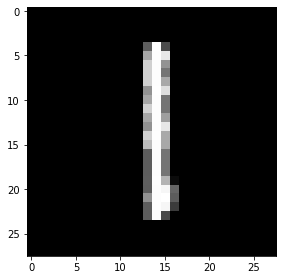

In [104]:
ix=np.random.randint(len(x_test))
imshow(x_test[ix])

In [105]:
inpt=x_test[ix].reshape(28*28)/255
pred=np.dot(relu(np.dot(inpt,W01)),W12)
print(np.argmax(pred))

1


**Пакетный градиентный спуск** 

In [16]:
batch_size=100
learning_rate, niter= (0.001,300)
hidden_size, pix_per_img, num_labels = (100,784,10)
W01=0.2*np.random.random((pix_per_img,hidden_size)) - 0.1
W12=0.2*np.random.random((hidden_size,num_labels)) - 0.1
for j in range(0,niter):
  error, correct_cnt=(0.0,0)
  for i in range(0,int(len(images)/batch_size)):
    batch_start, batch_end= i*batch_size, (i+1)*batch_size
    l0=images[batch_start:batch_end]
    l1=relu(np.dot(l0,W01))
    dropout_mask=np.random.randint(2,size=l1.shape)
    l1*=dropout_mask*2
    l2=np.dot(l1,W12)

    error+=np.sum((labels[batch_start:batch_end]-l2)**2)
    for k in range(batch_size):
      correct_cnt+=int(np.argmax(l2[k:k+1])==np.argmax(labels[batch_start+k:batch_end+k+1]))
    l2_delta=labels[batch_start:batch_end]-l2
    l1_delta=np.dot(l2_delta,W12.T)*relu2div(l1)
    l1_delta*=dropout_mask
    W12+=learning_rate*l1.T.dot(l2_delta)
    W01+=learning_rate*l0.T.dot(l1_delta)
  if (j%10==0 or j==niter-1):
    test_error=0
    test_correct_cnt=0
    for i in range(len(test_images)):
      l0=test_images[i:i+1]
      l1=relu(np.dot(l0,W01))
      l2=np.dot(l1,W12)
      test_error+=np.sum((test_labels[i:i+1]-l2)**2)
      test_correct_cnt+=int(np.argmax(test_labels[i:i+1])==np.argmax(l2))
    print('iter: {} test_err: {} test_acc: {} train_err: {} train_acc: {}'.format(j,test_error/float(len(test_images)),test_correct_cnt/float(len(test_images)),error/float(len(labels)),correct_cnt/(float(len(labels)))   ))   


iter: 0 test_err: 0.813491788077794 test_acc: 0.4074 train_err: 1.2327966608615142 train_acc: 0.17
iter: 10 test_err: 0.5706525290812868 test_acc: 0.7288 train_err: 0.6164222961127107 train_acc: 0.657
iter: 20 test_err: 0.5081162121640259 test_acc: 0.7729 train_err: 0.5338737384320642 train_acc: 0.741
iter: 30 test_err: 0.4799421688513726 test_acc: 0.7849 train_err: 0.49839568080357455 train_acc: 0.761
iter: 40 test_err: 0.46045143124998766 test_acc: 0.7969 train_err: 0.4902320871724891 train_acc: 0.757
iter: 50 test_err: 0.45216149813346584 test_acc: 0.8009 train_err: 0.47616755419530765 train_acc: 0.765
iter: 60 test_err: 0.4423803794145082 test_acc: 0.8025 train_err: 0.4515476526489305 train_acc: 0.803
iter: 70 test_err: 0.43451981356182506 test_acc: 0.8045 train_err: 0.44830331617454183 train_acc: 0.789
iter: 80 test_err: 0.43290240929063994 test_acc: 0.806 train_err: 0.4495925446751689 train_acc: 0.794
iter: 90 test_err: 0.4271941215972077 test_acc: 0.8064 train_err: 0.42609978332

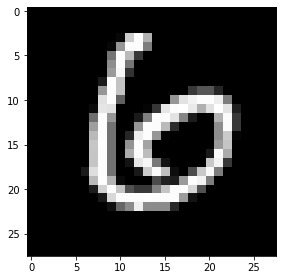

In [17]:
ix=np.random.randint(len(x_test))
imshow(x_test[ix])

In [18]:
inpt=x_test[ix].reshape(28*28)/255
pred=np.dot(relu(np.dot(inpt,W01)),W12)
print(np.argmax(pred))

6
